In [1]:
! pip install fonttools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 5.0 MB/s 


In [2]:
import os
import random
import string
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from tqdm import tqdm
from io import BytesIO
from toolz.curried import *
import requests

In [3]:
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode

In [4]:
! git clone https://github.com/fatihkaan22/ocr-digital-display/

Cloning into 'ocr-digital-display'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 99 (delta 52), reused 82 (delta 41), pack-reused 0
Unpacking objects: 100% (99/99), done.


In [5]:
paths = {
  'fonts': os.path.join('ocr-digital-display','synthetic-data-generation', 'fonts')
}

In [9]:
def get_wordlist():
  word_site = "https://www.mit.edu/~ecprice/wordlist.10000"
  response = requests.get(word_site)
  return response.content.splitlines()

WORDS = get_wordlist()
# ALPHAS = [':', '.'] # TODO: &
ALPHAS = []

def char_list():
  return concatv(
      string.ascii_letters,
      string.digits,
      ALPHAS
  )

def supported_chars(ttfont):
  return pipe(
    ttfont,
    lambda f: f['cmap'].tables,
    map(lambda x: x.cmap.items()),
    merge,
    lambda d: list(d.keys()),
    filter(lambda char_code: chr(char_code) in char_list()),
    list
  )

def is_supported(charset, font):
  return set(
      map(ord)(charset)
    ).issubset(supported_chars(font))
    
def random_string_from_charset(charset):
  return pipe(
      range(random.randrange(5,15)),
      map(lambda _: random.choice(charset)),
      reduce(lambda a, b: str(a) + str(b)),
  )

def random_digits():
  return random_string_from_charset(string.digits)

def random_word():
  return pipe(
      WORDS,
      random.choice,
      lambda bs: bs.decode("utf-8") 
  )

# TODO: test curry
def supported_filter(font):
  def test(string):
    return is_supported(string, font)
  return test

def sample_text(font):
  return pipe([
#      random_string_from_charset(list(string.digits) + ALPHAS),
#      random_word(),
      random_digits()
    ],
    filter(supported_filter(font)),
    filter(supported_filter(font)),
    list,
    random.choice
  )

In [6]:
# TODO: unused
def is_digits_supported(font):
  return is_supported(string.digits, font)

# TODO: unused
def is_letters_supported(font):
  return is_supported(string.ascii_letters, font)

# TODO: unused
def is_alphas_supported(font):
  return is_supported(ALPHAS, font)

# TODO: unused
def random_gibberish(font):
  return pipe(
      range(random.randrange(5,15)),
      map(lambda _: chr(random.choice(supported_chars(font)))),
      reduce(lambda a, b: str(a) + str(b)),
  )

444340085036
('High speed', 'Regular')


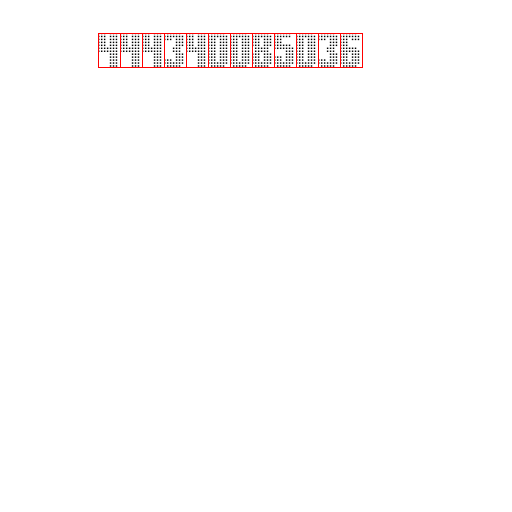

952467
('DSEG14 Classic Mini', 'Italic')


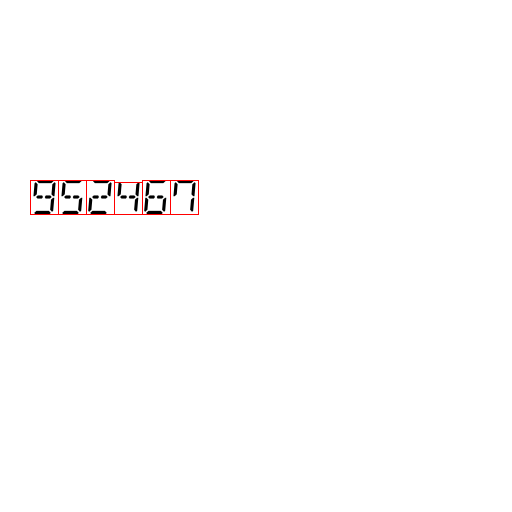

771987
('DSEG7 Modern Mini', 'LightItalic')


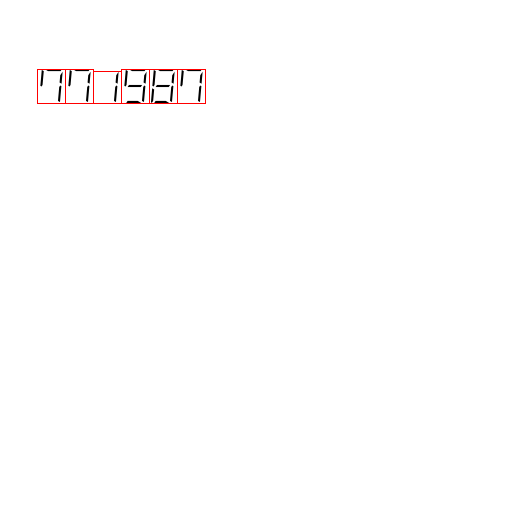

77142394176819
('DSEG7 Modern', 'BoldItalic')


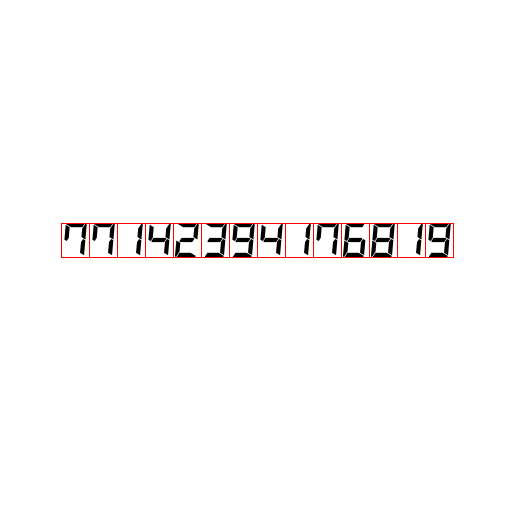

85646720
('LCD', '14Italic')


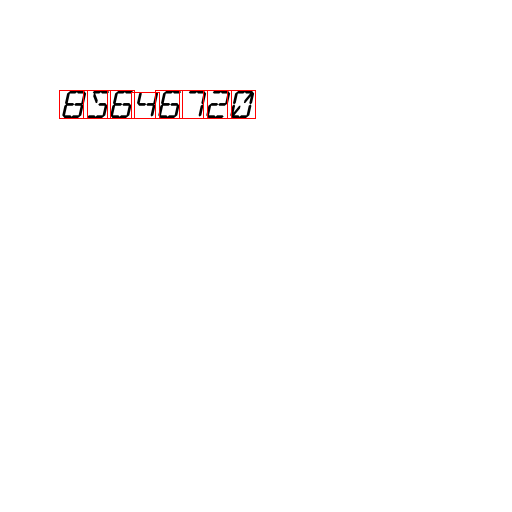

63001
('DSEG7 Modern', 'Regular')


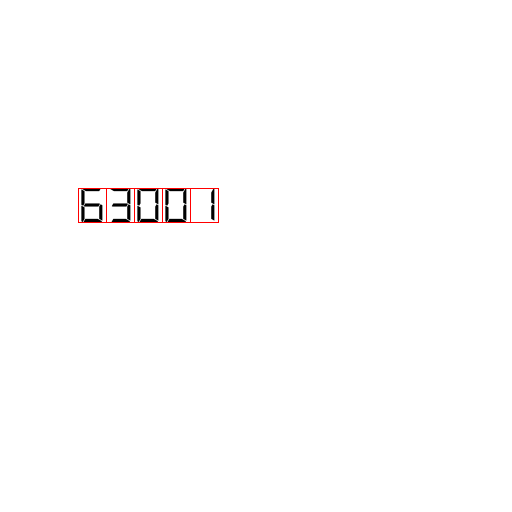

123386982
('DSEG14 Classic Mini', 'Light')


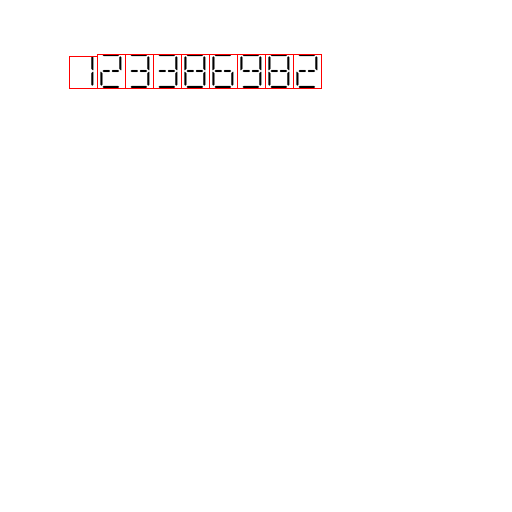

936288425704
('Digital Numbers', 'Regular')


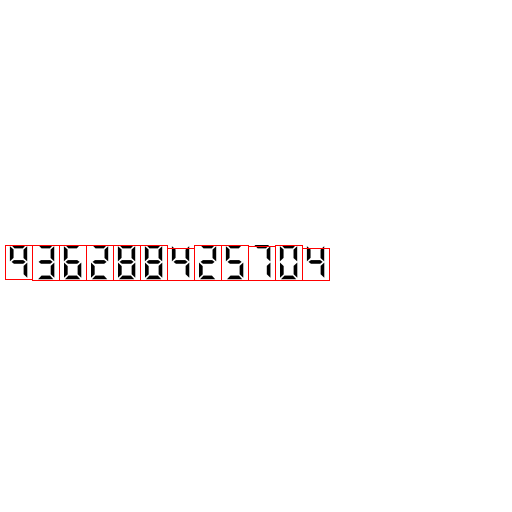

8645029414991
('DSEG14 Classic', 'LightItalic')


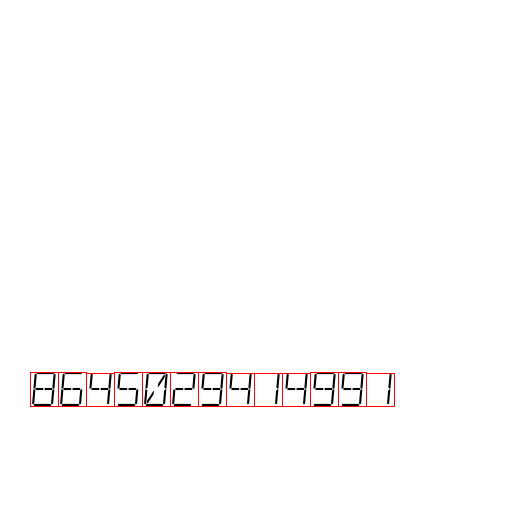

63025
('DSEG7 Classic Mini', 'Italic')


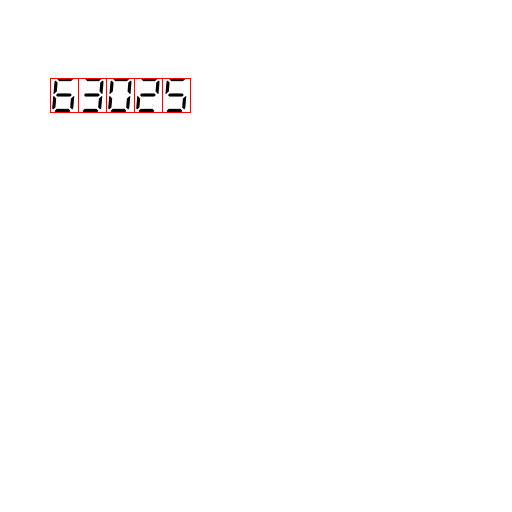

506792317432
('DSEG14 Classic', 'Light')


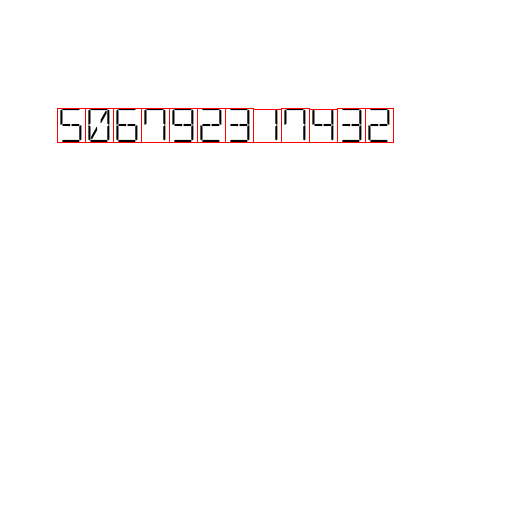

844178808
('Dot Matrix', 'Regular')


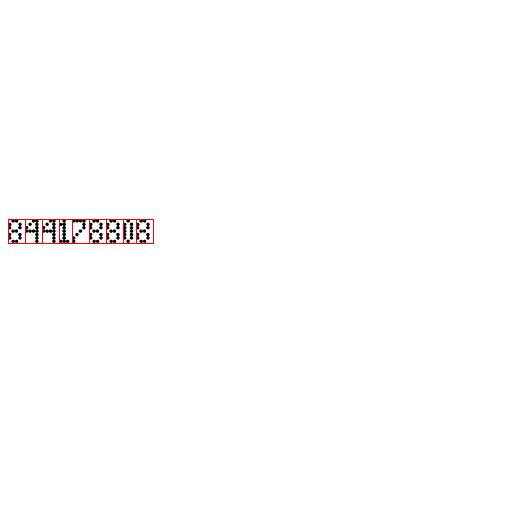

8594075
('LCD', '14ItalicCondensed')


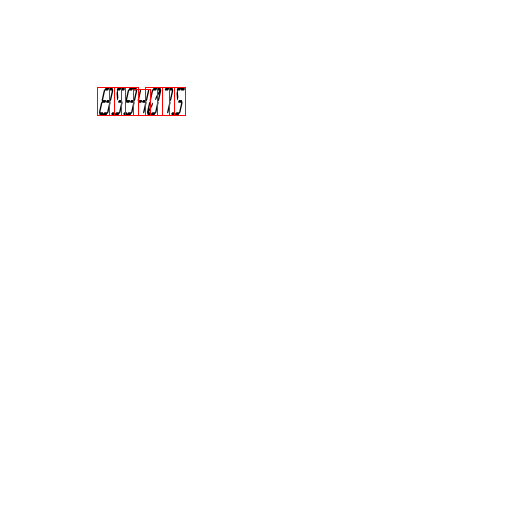

44408164
('LCD', '14Condensed')


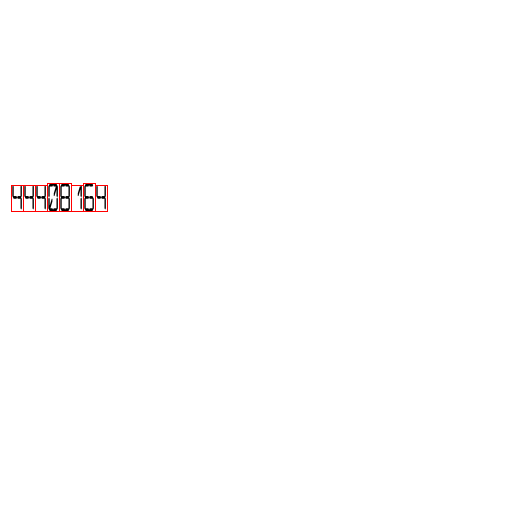

468308
('London Underground', 'Heavy')


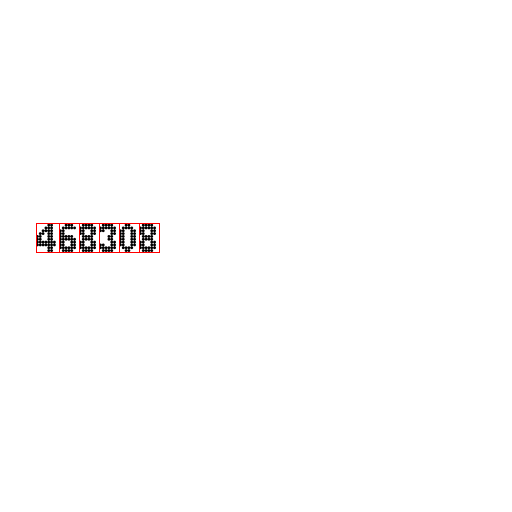

384098
('DSEG7 Classic', 'LightItalic')


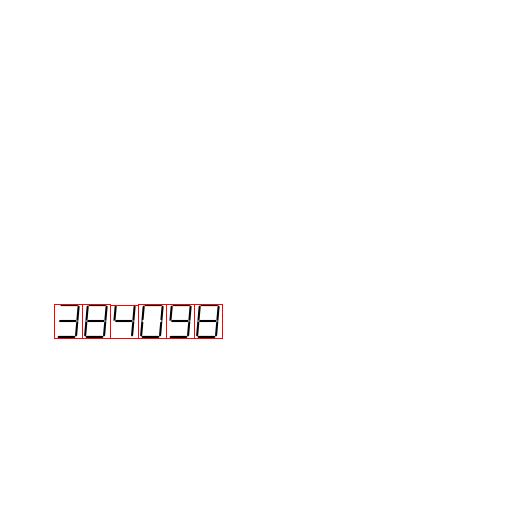

09211305
('DSEG7 Modern', 'Bold')


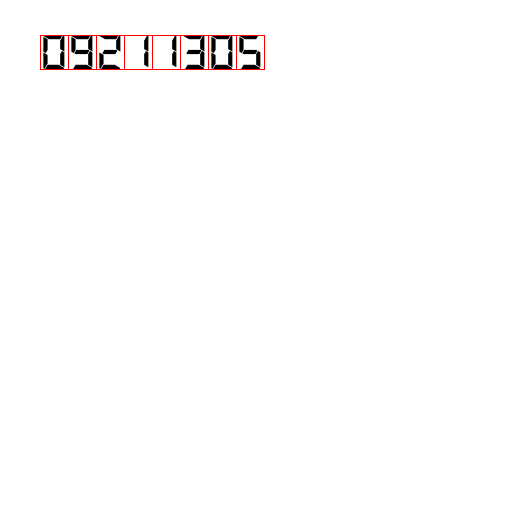

0675234
('DSEG14 Classic', 'Bold')


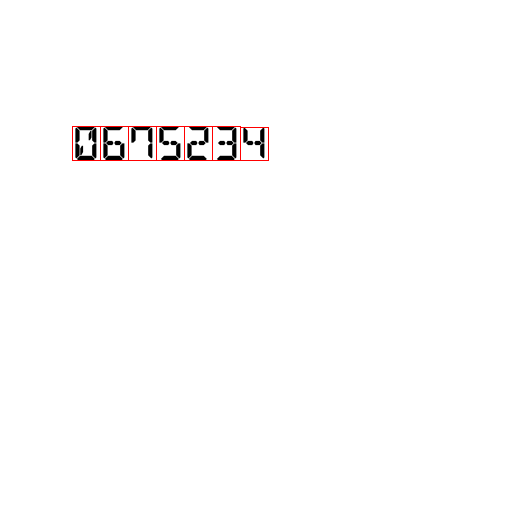

4781130525206
('DSEG7 Modern Mini', 'Bold')


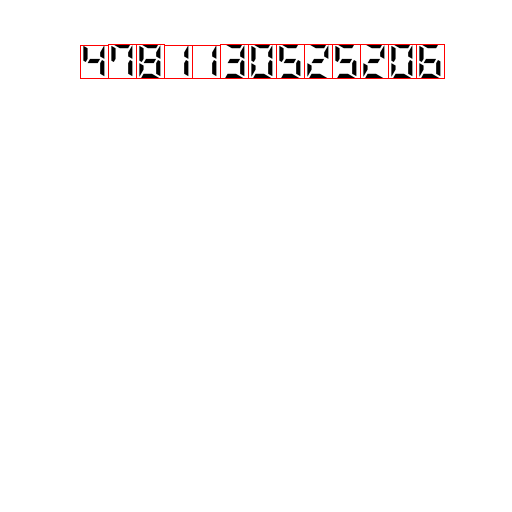

487647619
('DSEG7 Classic Mini', 'BoldItalic')


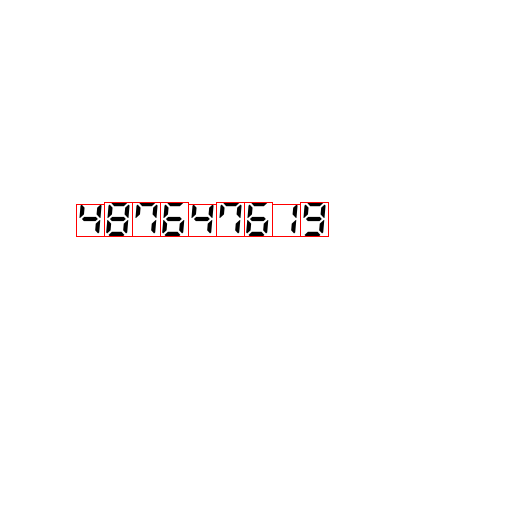

65650417500
('DSEG7 Classic Mini', 'Regular')


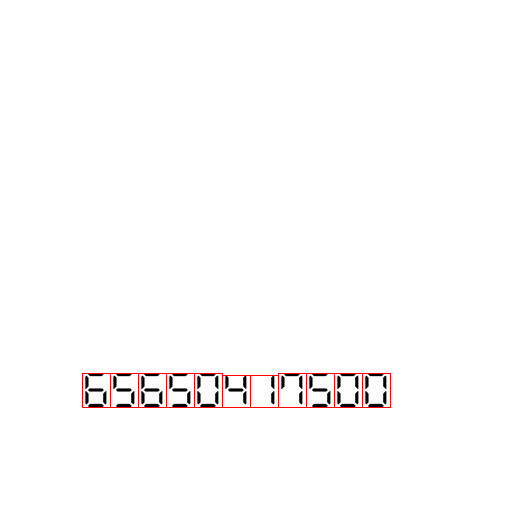

1212102
('DSEG7 Classic Mini', 'Light')


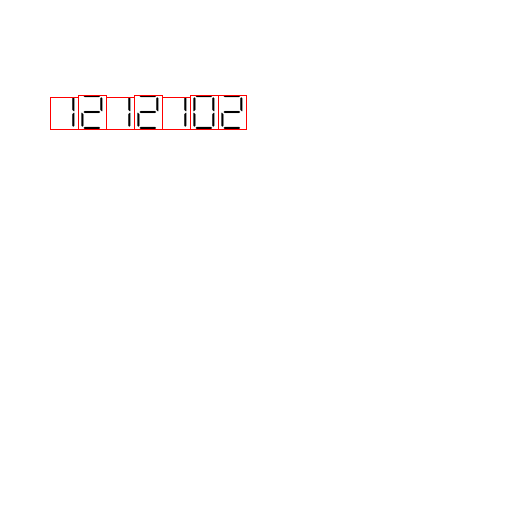

0341835029
('DSEG7 Modern', 'Light')


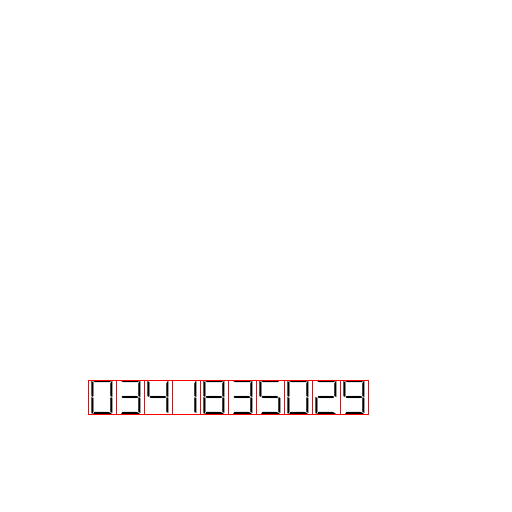

06687
('DSEG14 Classic', 'Italic')


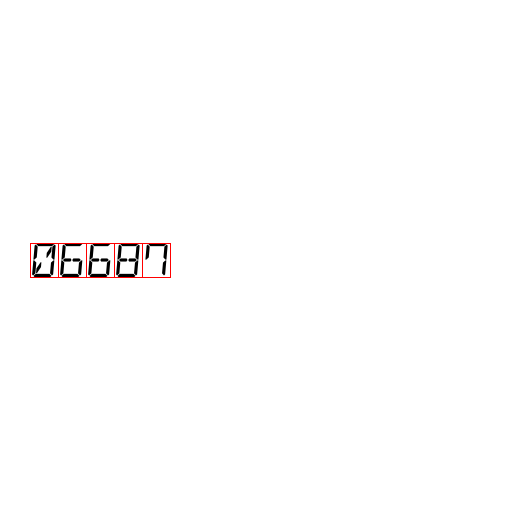

107858021
('DotMatrix', 'Regular')


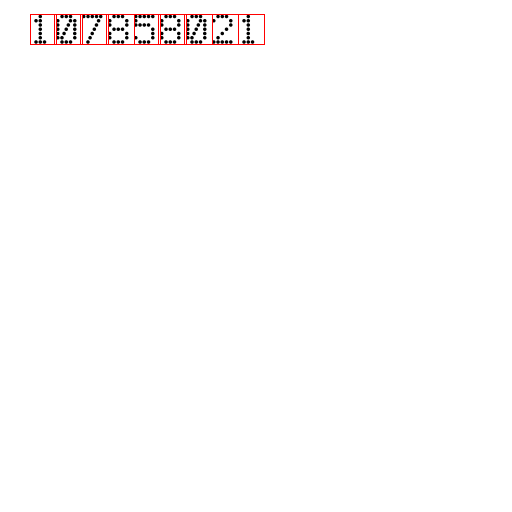

6334788
('DSEG7 Modern Mini', 'Regular')


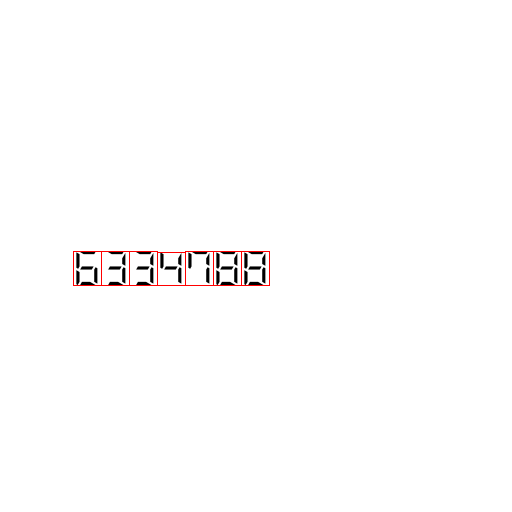

664551
('LCD', '14')


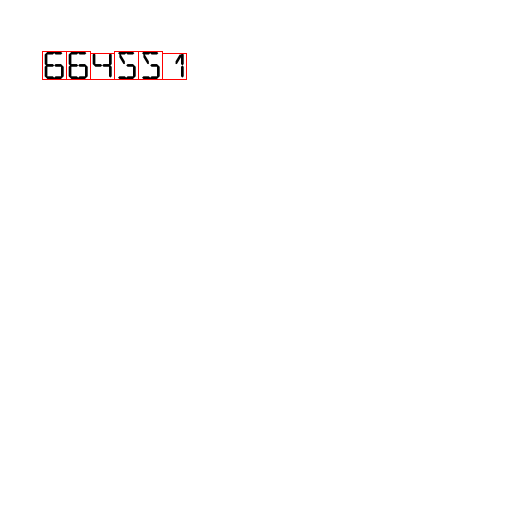

3534515399511
('London Underground', 'Bold')


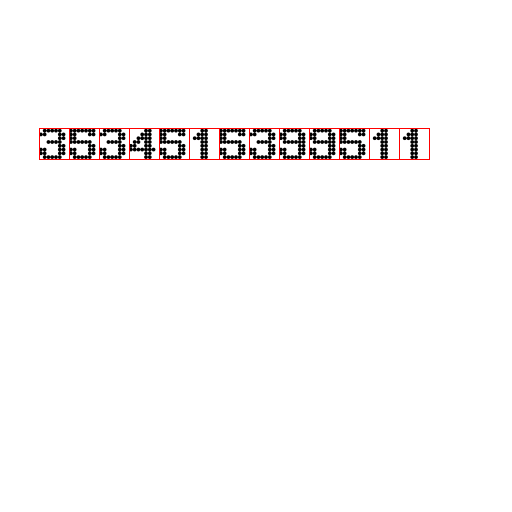

1668770695926
('DSEG14 Classic', 'Regular')


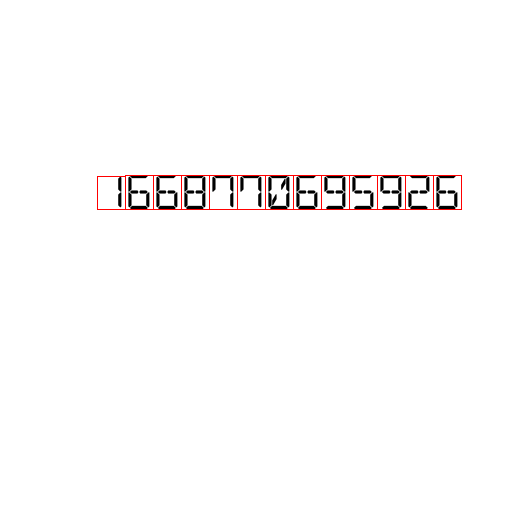

75916740
('DSEG7 Modern Mini', 'Light')


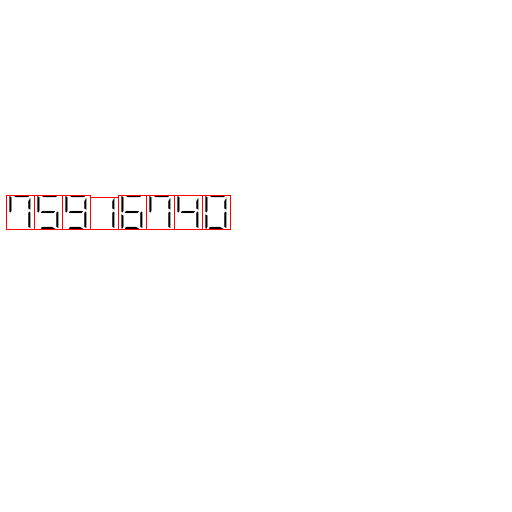

IndexError: ignored

In [28]:
def draw_sample(font_path):
  word = sample_text(TTFont(font_path))
  font = ImageFont.truetype(font_path, 34)
  img = Image.new("RGBA", (512,512),(255,255,255))
  draw = ImageDraw.Draw(img)
  xy = (random.randrange(5, 100), 
        random.randrange(10, 400))
  draw.text(xy,word,(0,0,0),font=font)
  draw = ImageDraw.Draw(img)
  for i, char in enumerate(word):
    right, bottom = font.getsize(word[:i+1])
    width, height = font.getmask(char).size
    right += xy[0]
    bottom += xy[1]
    top = bottom - height
    left = right - width
    draw.rectangle((left, top, right, bottom), None, '#f00')
  return {'img': img, 'text': word, 'font': font.getname()}

def generate_data(fonts, sample_count=1):
  return pipe(
      fonts,
      mapcat(lambda font: pipe(
          range(sample_count),
          map(lambda _: font),
          map(draw_sample),
      )),
  )

def get_font_path(filename):
  return os.path.join(paths['fonts'], filename)

font_paths = map(get_font_path)(os.listdir(paths['fonts']))

for d in generate_data(font_paths, 1):
  print(d['text'])
  print(d['font'])
  display(d['img'])

86787163921186
('DSEG7 Classic', 'BoldItalic')


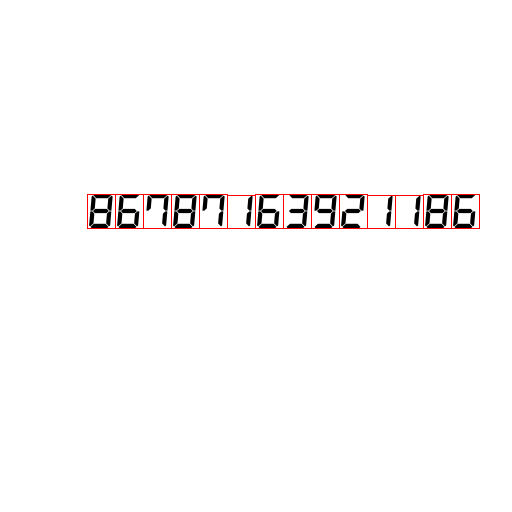

In [40]:
#dseg7_font = ('DSEG7 Classic', 'BoldItalic')

ims = []

for d in generate_data([get_font_path('DSEG7Classic-BoldItalic.ttf')]):
  print(d['text'])
  print(d['font'])
  display(d['img'])
  ims.append(d['img'])